## MDVR-KCL experiments using the segmented wav files. (acoustic features alone)

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import auc
#from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [3]:
# only acoustic features
df = pd.read_csv("../MDVR_acoustic_features_chunks.csv")
#df = shuffle(df)
#df.reset_index(inplace=True, drop=True)
df.drop('voiceID', inplace = True, axis = 1)
df['label'].value_counts()
df.head()

len(df)

816

In [4]:
#drop rows wth na
df = df.dropna()
len(df)

808

In [5]:
#separate dependent and independent variable for acoustic features only
X = df.iloc[:, :-1]
df_X = df.iloc[:, :-1].values
df_Y = df.iloc[:,-1].values

# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.3, random_state = 0)

In [6]:
# Scale for acoustic features
#sc = StandardScaler()
sc = MinMaxScaler()
#sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10
0,0.154648,0.012578,0.787054,0.045324,0.065681,0.049453,0.027517,0.117502,0.140266,0.171648,0.150775
1,0.359383,0.138233,0.527694,0.146881,0.118045,0.124615,0.059992,0.208179,0.392777,0.114899,0.090757
2,0.266854,0.158108,0.644371,0.082157,0.082628,0.042779,0.024084,0.126883,0.194980,0.143321,0.118694
3,0.989576,0.300506,0.481678,0.665703,0.253371,0.560716,0.625995,0.457918,0.610710,0.501694,0.186052
4,0.492156,0.149232,0.118242,0.243871,0.159527,0.185294,0.106677,0.324000,0.515990,0.199637,0.107838
...,...,...,...,...,...,...,...,...,...,...,...
560,0.274639,0.178036,0.705424,0.134340,0.129217,0.107191,0.050935,0.235467,0.330539,0.297956,0.216335
561,0.179311,0.269568,0.364460,0.209696,0.250382,0.185847,0.066050,0.194868,0.300701,0.267327,0.150002
562,0.079025,0.059888,0.477472,0.110413,0.186168,0.065168,0.034257,0.129020,0.184829,0.147221,0.131005
563,0.144036,0.093019,0.734637,0.153207,0.206145,0.132728,0.085890,0.159813,0.276885,0.171980,0.125916


In [7]:
###### KNNN ###########
# Fit classifier to the Training set
#KNN
model_knn = KNeighborsClassifier(n_neighbors = 10)
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

accuracy_knn = ((conf_matrix_knn[0,0] + conf_matrix_knn[1,1])/(conf_matrix_knn[0,0] +conf_matrix_knn[0,1]+conf_matrix_knn[1,0]+conf_matrix_knn[1,1]))*100


print("Classification Accuracy: ", accuracy_knn)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_knn))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_knn))

print(y_pred_knn)

print(conf_matrix_knn)

Classification Accuracy:  71.60493827160494
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       137
           1       0.74      0.54      0.62       106

    accuracy                           0.72       243
   macro avg       0.72      0.70      0.70       243
weighted avg       0.72      0.72      0.71       243

0.6958752237983749
[0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0
 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0
 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1
 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[[117  20]
 [ 49  57]]


In [8]:
#### SVM
import matplotlib.pyplot as plt
model_svm = svm.SVC()
model_svm = model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

accuracy_svm = ((conf_matrix_svm[0,0] + conf_matrix_svm[1,1])/(conf_matrix_svm[0,0] +conf_matrix_svm[0,1]+conf_matrix_svm[1,0]+conf_matrix_svm[1,1]))*100


print("Classification Accuracy: ", accuracy_svm)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_svm))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_svm))

print(y_pred_svm)

print(conf_matrix_svm)

Classification Accuracy:  73.25102880658436
              precision    recall  f1-score   support

           0       0.71      0.88      0.79       137
           1       0.78      0.54      0.64       106

    accuracy                           0.73       243
   macro avg       0.75      0.71      0.71       243
weighted avg       0.74      0.73      0.72       243

0.7104737639443603
[0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0
 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0
 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[[121  16]
 [ 49  57]]


In [9]:
####Decision Tree
import matplotlib.pyplot as plt
model_dt = tree.DecisionTreeClassifier()
model_dt = model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

accuracy_dt = ((conf_matrix_dt[0,0] + conf_matrix_dt[1,1])/(conf_matrix_dt[0,0] +conf_matrix_dt[0,1]+conf_matrix_dt[1,0]+conf_matrix_dt[1,1]))*100


print("Classification Accuracy: ", accuracy_dt)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_knn))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_knn))

print(y_pred_dt)

print(conf_matrix_dt)

Classification Accuracy:  62.96296296296296
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       137
           1       0.74      0.54      0.62       106

    accuracy                           0.72       243
   macro avg       0.72      0.70      0.70       243
weighted avg       0.72      0.72      0.71       243

0.6958752237983749
[1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0
 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0
 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1
 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1
 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0]
[[93 44]
 [46 60]]


In [10]:
####Niaves Bayes
model_nb = GaussianNB()
model_nb = model_nb.fit(X_train, y_train)


y_pred_nb = model_nb.predict(X_test)

conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

accuracy_nb = ((conf_matrix_nb[0,0] + conf_matrix_nb[1,1])/(conf_matrix_nb[0,0] +conf_matrix_nb[0,1]+conf_matrix_nb[1,0]+conf_matrix_nb[1,1]))*100


print("CLassifictaion Accuracy:", accuracy_nb)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_nb))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_nb))

print(y_pred_nb)

print(conf_matrix_nb)


CLassifictaion Accuracy: 67.07818930041152
              precision    recall  f1-score   support

           0       0.67      0.83      0.74       137
           1       0.68      0.46      0.55       106

    accuracy                           0.67       243
   macro avg       0.67      0.65      0.65       243
weighted avg       0.67      0.67      0.66       243

0.647190469632282
[0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1
 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
[[114  23]
 [ 57  49]]


In [11]:
model_rf = RandomForestClassifier()
model_rf = model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

accuracy_rf = ((conf_matrix_rf[0,0] + conf_matrix_rf[1,1])/(conf_matrix_rf[0,0] +conf_matrix_rf[0,1]+conf_matrix_rf[1,0]+conf_matrix_rf[1,1]))*100


print("CLassification Accuracy: ", accuracy_rf)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_rf))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_rf))

print(y_pred_rf)

print(conf_matrix_rf)

CLassification Accuracy:  74.8971193415638
              precision    recall  f1-score   support

           0       0.74      0.86      0.79       137
           1       0.77      0.60      0.68       106

    accuracy                           0.75       243
   macro avg       0.75      0.73      0.74       243
weighted avg       0.75      0.75      0.74       243

0.7325437267593995
[0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0
 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0
 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0]
[[118  19]
 [ 42  64]]


In [12]:
pd.DataFrame
data = {'ML Alg':['KNN', 'SVM', 'Decision Tree', 'Naive Bayes', 'Random Forest'],
        'Accuracy':[accuracy_knn, accuracy_svm, accuracy_dt, accuracy_nb, accuracy_rf]}
  
# Create DataFrame
df_results = pd.DataFrame(data)
df_results

,ML Alg,Accuracy
0,KNN,71.604938
1,SVM,73.251029
2,Decision Tree,62.962963
3,Naive Bayes,67.078189
4,Random Forest,74.897119


## K fold evaluation

In [13]:
def kfold_eval(alg):
    df_X = df.iloc[:, :-1].values
    df_Y = df.iloc[:,-1].values
    
    df_X = pd.DataFrame(df_X)
    df_Y = pd.DataFrame(df_Y)

    parts = 6
    kfold = KFold(parts, shuffle=True)
    
    accuracy_list = []
    sensitivity_list = []
    specificity_list = []
    precision_list =[]
    f1_knn_list = []
    
    for i in range(1, 11):
        accuracy_total = 0
        sensitivity_total =0
        specificity_total=0
        precision_total=0
        f1_knn_total=0
        
        for train, test in kfold.split(df_X,df_Y):
            Xtrain = df_X.iloc[train, :]
            #print(Xtrain)
            Ytrain = df_Y.iloc[train, :]
            #print(Ytrain)
            Xtest = df_X.iloc[test, :]
            Ytest = df_Y.iloc[test, :]
            #scale
            sc = MinMaxScaler()
            Xtrain = sc.fit_transform(Xtrain)
            Xtest = sc.transform(Xtest)
            
            #modelling
            if (alg == "LR"):
                model = LogisticRegression()
            elif (alg == "GB"):
                model = GradientBoostingClassifier(learning_rate= 0.5, max_depth=1,n_estimators=3)
            elif (alg == "KNN"):
                model = KNeighborsClassifier(n_neighbors = 10)
            elif (alg == "SVM"):
                model = svm.SVC()
            elif (alg == "DT"):
                model = tree.DecisionTreeClassifier()
            elif (alg == "NB"):
                model =  GaussianNB()
            elif (alg == "RF"):
                model = RandomForestClassifier()
                
            model.fit(Xtrain, Ytrain)
            y_pred = model.predict(Xtest)

            conf_matrix = confusion_matrix(Ytest, y_pred)
            #print(conf_matrix)
            TN = conf_matrix[0][0]
            FP = conf_matrix[0][1]
            FN = conf_matrix[1][0]
            TP = conf_matrix[1][1]
            #print(TN, ", ", FP, ", ", FN, ", ", TP)

            accuracy = ((TP + TN) / (TP + TN + FP + FN)) * 100
            sensitivity = (TP/(TP+FN)) * 100 #recall
            specificity = (TN/(TN + FP)) * 100
            precision = (TP/(TP+FP)) * 100
            f1_knn = 2 *((sensitivity * precision)/(sensitivity + precision))
            
            #sum it up
            accuracy_total += accuracy
            sensitivity_total += sensitivity
            specificity_total += specificity
            precision_total += precision
            f1_knn_total += f1_knn
            
            #avg
            accuracy_mean = accuracy_total/parts
            sensitivity_mean = sensitivity_total/parts
            specificity_mean = specificity_total/parts
            precision_mean = precision_total/parts
            f1_mean = f1_knn_total/parts
            
        #print("Loop ", i, "\n Mean Accuracy: ", accuracy_total/parts,
                           #  "\n Mean sensitivity: ",sensitivity_total/parts,
                            # "\n Mean Specificity: ", specificity_total/parts,
                             #"\n Mean Precision: ",precision_total/parts,
                             #"\n Mean f1: ",f1_knn_total/parts)
        accuracy_list.append(accuracy_mean)
        sensitivity_list.append(sensitivity_mean)
        specificity_list.append(specificity_mean)
        precision_list.append(precision_mean)
        f1_knn_list.append(f1_mean)
        
    print(alg)
    print("Accuracy for the 10 iterations: ",  accuracy_list) #mean accuracy acros the 6 folds for each iteration
    print("Average accuracy: ", np.mean(accuracy_list), "\n")
    
    print("Sensitivity for the 10 iterations: ",  sensitivity_list) #mean accuracy acros the 6 folds for each iteration
    print("Average sensitivity: ", np.mean(sensitivity_list), "\n")
        
    print("Specificity for the 10 iterations: ",  specificity_list) #mean accuracy acros the 6 folds for each iteration
    print("Average specificity: ", np.mean(specificity_list), "\n")
    
    print("Precision for the 10 iterations: ",  precision_list) 
    print("Average precision: ", np.mean(precision_list), "\n")
    
    print("F1  score for the 10 iterations: ",  f1_knn_list) 
    print("Average f1 score: ", np.mean(f1_knn_list), "\n")
       
    
        
    

In [14]:
kfold_eval("KNN")

print("\n")
kfold_eval("DT")

print("\n")
kfold_eval("SVM")

print("\n")
kfold_eval("NB")

print("\n")
kfold_eval("LR")

print("\n")
kfold_eval("GB")

print("\n")
kfold_eval("RF")

C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

KNN
Accuracy for the 10 iterations:  [77.48019163442049, 77.47189976045698, 77.97586143357289, 77.10060807075733, 76.47779620416436, 77.47558503777411, 75.87433204348628, 78.09379030772065, 77.85240464344942, 77.9703335175972]
Average accuracy:  77.37728026533998 

Sensitivity for the 10 iterations:  [64.25599254546624, 63.15635559365753, 65.35337405954003, 62.21909364093182, 62.67884963168107, 63.35494591136992, 61.11755820807545, 62.91902364415955, 64.19086362707206, 64.54482939091046]
Average sensitivity:  63.37908862528641 

Specificity for the 10 iterations:  [87.05559729813596, 87.92043670949715, 87.22308982852341, 88.18466414780853, 86.58501601684328, 87.57610010751985, 86.7905845831625, 88.92422563935061, 87.77256607497831, 87.74455024920177]
Average specificity:  87.57768306550213 

Precision for the 10 iterations:  [77.15384767619382, 79.4536122417821, 78.80330718145844, 79.09281894576013, 77.4833108581077, 79.23006944746076, 76.63339498755134, 80.31077356797007, 79.279383677

C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

SVM
Accuracy for the 10 iterations:  [77.97401879491433, 76.8536944905104, 76.60125299428782, 77.10613598673301, 77.59904182789755, 77.4755850377741, 76.73392297770407, 77.35120692832136, 78.46231803943247, 77.10060807075732]
Average accuracy:  77.32577851483323 

Sensitivity for the 10 iterations:  [60.73005948905374, 60.25137388354753, 60.252356981284784, 60.83245571263319, 61.76573995176949, 60.806822729091635, 59.87035260446493, 60.142772381883084, 62.582354347891076, 60.34041160706614]
Average sensitivity:  60.757469968868556 

Specificity for the 10 iterations:  [90.50781454264309, 88.93948076992713, 88.80769688716242, 89.09276463269204, 89.35489844890463, 89.64045374019673, 88.88422354916827, 89.79716897284048, 90.00629895570307, 89.35470275725505]
Average specificity:  89.43855032564929 

Precision for the 10 iterations:  [82.02956061651714, 79.72787510830989, 79.64391146242575, 80.02905365389721, 80.01471771591397, 81.66393418409547, 79.67333921128727, 81.26609538182392, 82.14

C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

NB
Accuracy for the 10 iterations:  [68.44112769485905, 67.46268656716417, 68.07536392113506, 66.81776303666851, 68.68619863644739, 66.21614151464898, 66.09084208586695, 66.83342546526626, 68.56734844297033, 67.6865671641791]
Average accuracy:  67.48774645292059 

Sensitivity for the 10 iterations:  [54.179644031794574, 52.297285608481054, 54.74732712039659, 54.5096809818834, 53.671609667916776, 54.57993803582039, 53.55007285858349, 52.94995128328461, 54.33413446080653, 55.36950682303984]
Average sensitivity:  54.01891508720073 

Specificity for the 10 iterations:  [78.8088957198094, 78.31055656604427, 77.7999466703706, 75.88164019737252, 79.74120461368743, 74.82405866356639, 75.87084361271397, 77.00180190253646, 78.72437919446823, 76.67450254397028]
Average specificity:  77.36378296845396 

Precision for the 10 iterations:  [66.34540906181981, 64.21646167814264, 66.13687484455585, 62.24076678882991, 65.92145599498541, 61.78177753689994, 61.77834075444158, 63.33278204933827, 64.5991300

C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

LR
Accuracy for the 10 iterations:  [74.74940114243597, 74.75492905841163, 74.50893679749402, 74.5098581168233, 74.61857379767828, 73.50562004790861, 74.51262207481113, 74.76045697438732, 74.26386585590565, 74.8737792518887]
Average accuracy:  74.50580431177447 

Sensitivity for the 10 iterations:  [57.64315625307005, 57.878046625591814, 58.09213062147605, 58.423759053991, 57.816956183562354, 55.71173395422221, 57.70687468941512, 57.24683801530184, 56.34733483220796, 57.30555882011351]
Average sensitivity:  57.41723890489519 

Specificity for the 10 iterations:  [87.10082628758067, 87.08030871701986, 86.63015101577192, 86.57287824439523, 86.79214596936116, 86.41075990219827, 86.68266479284758, 87.7282500885442, 87.28227871877034, 87.60900389002023]
Average specificity:  86.98892676265095 

Precision for the 10 iterations:  [75.97341410789338, 76.05699855699856, 76.35599127377573, 75.87676381165599, 75.99308324232337, 74.3729704249278, 75.90772832973629, 77.0857540893296, 76.24178408073

C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GB
Accuracy for the 10 iterations:  [75.49843375714023, 75.6255758245808, 75.74350469872859, 75.73889810208219, 75.24875621890547, 75.73613414409435, 75.86511885019347, 75.36115717707757, 75.49659111848167, 75.61728395061728]
Average accuracy:  75.59314538419017 

Sensitivity for the 10 iterations:  [47.56194064798539, 48.158748564089144, 47.36981521028503, 47.1474158390353, 47.32723469513345, 47.841308242664944, 47.752720859378265, 48.265220695341675, 47.96877987263726, 48.327146779204234]
Average sensitivity:  47.772033140575466 

Specificity for the 10 iterations:  [95.69550945746447, 95.7483638472532, 96.16925889586709, 96.23969258800719, 95.30788225822484, 96.012715388166, 95.99345511954749, 95.46097786146224, 95.42716879437675, 95.75290451811922]
Average specificity:  95.78079287284885 

Precision for the 10 iterations:  [89.13906085949095, 89.4152777047514, 89.58122337432683, 89.82142857142857, 87.91384498921597, 90.35542951671984, 88.97779679029678, 88.64386561432707, 88.538560

C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\wbblo\Anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

RF
Accuracy for the 10 iterations:  [78.46416067809103, 78.96443707388981, 78.71568085498434, 80.07923346231804, 78.3480744426018, 78.71844481297218, 78.71199557766722, 79.32651557029665, 77.85240464344942, 78.71568085498433]
Average accuracy:  78.78966279712547 

Sensitivity for the 10 iterations:  [66.26342419601691, 66.54633801183245, 64.29454096803823, 67.07104552415505, 64.86124305077426, 66.52450895729665, 66.59483749682168, 66.86697237799542, 63.25950063245889, 65.81000523908642]
Average sensitivity:  65.8092416454476 

Specificity for the 10 iterations:  [87.23769645238667, 88.03472490807144, 89.00527534712603, 89.60371950079353, 88.1164031164031, 87.54640107959892, 87.76625771488784, 88.46081919357782, 88.59834239978034, 88.13794312286059]
Average specificity:  88.25075828354863 

Precision for the 10 iterations:  [78.68755333923235, 79.76256348528058, 80.15940108885748, 82.50579107356602, 79.60168760778517, 79.4273947814551, 79.58397054980905, 80.5557685684732, 80.49580243489

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors     import KNeighborsClassifier
from sklearn.metrics       import accuracy_score
import pandas as pd

# ── 1) Re-split from the original df so we still have DataFrames ──
X_full = df.iloc[:, :-1]      # acoustic features only
y_full = df.iloc[:,    -1]    # labels

X_tr_df, X_te_df, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.3, random_state=0
)

# ── 2) Baseline on ALL features ──
scaler = MinMaxScaler().fit(X_tr_df)
X_train = scaler.transform(X_tr_df)
X_test  = scaler.transform(X_te_df)

knn_base = KNeighborsClassifier(n_neighbors=10)
knn_base.fit(X_train, y_train)
baseline_acc = accuracy_score(y_test, knn_base.predict(X_test))

print(f"Baseline accuracy (all acoustic features): {baseline_acc:.4f}\n")

# ── 3) Feature-ablation loop ──
ablation = []
for feat in X_full.columns:
    # drop one column from the TRAIN and TEST DataFrames
    X_tr_drop = X_tr_df.drop(columns=[feat])
    X_te_drop = X_te_df.drop(columns=[feat])
    
    # re-scale
    sc2 = MinMaxScaler().fit(X_tr_drop)
    X_tr_s = sc2.transform(X_tr_drop)
    X_te_s = sc2.transform(X_te_drop)
    
    # retrain & evaluate
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(X_tr_s, y_train)
    acc = accuracy_score(y_test, knn.predict(X_te_s))
    
    ablation.append({
        'feature_removed':   feat,
        'accuracy':          acc,
        'delta_vs_baseline': acc - baseline_acc
    })

# ── 4) Summarize ──
ablation_df = pd.DataFrame(ablation).sort_values('delta_vs_baseline')
print("Ablation results (largest drop first):")
print(ablation_df.to_string(index=False))


Baseline accuracy (all acoustic features): 0.7160

Ablation results (largest drop first):
    feature_removed  accuracy  delta_vs_baseline
           meanF0Hz  0.674897          -0.041152
          rapJitter  0.707819          -0.008230
localabsoluteJitter  0.716049           0.000000
         ppq5Jitter  0.720165           0.004115
        apq3Shimmer  0.720165           0.004115
          stdevF0Hz  0.724280           0.008230
       localShimmer  0.724280           0.008230
     localdbShimmer  0.724280           0.008230
        localJitter  0.728395           0.012346
        apq5Shimmer  0.732510           0.016461
                HNR  0.740741           0.024691


In [ ]:
from sklearn.base        import clone
from sklearn.metrics     import accuracy_score
from sklearn.neighbors   import KNeighborsClassifier
from sklearn.svm         import SVC
from sklearn.tree        import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble    import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


models = {
    'KNN':                KNeighborsClassifier(n_neighbors=10),
    'SVM':                SVC(),
    'Decision Tree':      DecisionTreeClassifier(),
    'Naive Bayes':        GaussianNB(),
    'Random Forest':      RandomForestClassifier(),
    'Gradient Boosting':  GradientBoostingClassifier()
}

# 2) Prepare full DataFrames (
X_full = df.iloc[:, :-1]
y_full = df.iloc[:,  -1]

# 3) Single train/test split 
X_tr_df, X_te_df, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.3, random_state=0
)

# 4) Scale once for each model’s baseline
scaler = MinMaxScaler().fit(X_tr_df)
X_train = scaler.transform(X_tr_df)
X_test  = scaler.transform(X_te_df)

# 5) Loop over models & features
records = []
for name, base_model in models.items():
    # baseline accuracy with all features
    m0 = clone(base_model)
    m0.fit(X_train, y_train)
    base_acc = accuracy_score(y_test, m0.predict(X_test))
    
    # ablate each feature
    for feat in X_full.columns:
        # drop the feature from train & test
        X_tr_drop = X_tr_df.drop(columns=[feat])
        X_te_drop = X_te_df.drop(columns=[feat])
        
        # re-scale
        sc2    = MinMaxScaler().fit(X_tr_drop)
        X_tr_s = sc2.transform(X_tr_drop)
        X_te_s = sc2.transform(X_te_drop)
        
        # clone, fit, evaluate
        m = clone(base_model)
        m.fit(X_tr_s, y_train)
        acc = accuracy_score(y_test, m.predict(X_te_s))
        
        records.append({
            'model':           name,
            'feature_removed': feat,
            'accuracy':        acc,
            'delta_vs_base':   acc - base_acc
        })


ablation_all = pd.DataFrame(records)

# 7) View the worst hits first
print("Top 10 most‐harmful feature removals across all models:")
print(ablation_all.sort_values('delta_vs_base').head(10))


wide = ablation_all.pivot(index='feature_removed', 
                          columns='model', 
                          values='delta_vs_base')
print("\nΔ accuracy vs baseline (rows=features, cols=models):")
print(wide.to_string())


Top 10 most‐harmful feature removals across all models:
                model      feature_removed  accuracy  delta_vs_base
37        Naive Bayes  localabsoluteJitter  0.613169      -0.057613
44      Random Forest             meanF0Hz  0.703704      -0.049383
0                 KNN             meanF0Hz  0.674897      -0.041152
29      Decision Tree         localShimmer  0.617284      -0.037037
55  Gradient Boosting             meanF0Hz  0.703704      -0.037037
39        Naive Bayes           ppq5Jitter  0.637860      -0.032922
30      Decision Tree       localdbShimmer  0.621399      -0.032922
11                SVM             meanF0Hz  0.699588      -0.032922
13                SVM                  HNR  0.699588      -0.032922
15                SVM  localabsoluteJitter  0.703704      -0.028807

Δ accuracy vs baseline (rows=features, cols=models):
model                Decision Tree  Gradient Boosting       KNN  Naive Bayes  Random Forest       SVM
feature_removed                         

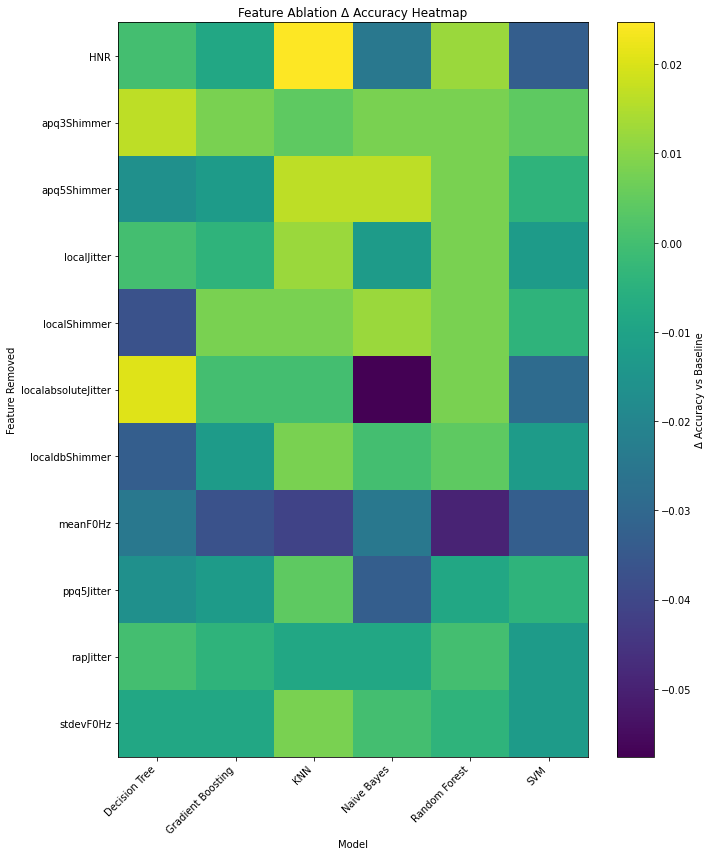

In [ ]:
import matplotlib.pyplot as plt


wide = ablation_all.pivot(
    index='feature_removed',
    columns='model',
    values='delta_vs_base'
)

plt.figure(figsize=(10, 12))
plt.imshow(wide.values, aspect='auto', interpolation='nearest')
plt.colorbar(label='Δ Accuracy vs Baseline')
plt.xticks(range(len(wide.columns)), wide.columns, rotation=45, ha='right')
plt.yticks(range(len(wide.index)), wide.index)
plt.xlabel('Model')
plt.ylabel('Feature Removed')
plt.title('Feature Ablation Δ Accuracy Heatmap')
plt.tight_layout()
plt.show()


Top 10 worst Δ accuracy drops (model × feature):
            model feature_removed  avg_accuracy  delta_vs_base
              KNN        meanF0Hz      0.615045      -0.138709
              SVM        meanF0Hz      0.618871      -0.129929
    Decision Tree             HNR      0.644874      -0.071682
    Decision Tree        meanF0Hz      0.667096      -0.049459
      Naive Bayes        meanF0Hz      0.587754      -0.043302
    Random Forest        meanF0Hz      0.761107      -0.032198
Gradient Boosting             HNR      0.757442      -0.024776
    Random Forest             HNR      0.768607      -0.024699
    Decision Tree     apq5Shimmer      0.694257      -0.022299
Gradient Boosting        meanF0Hz      0.761130      -0.021087


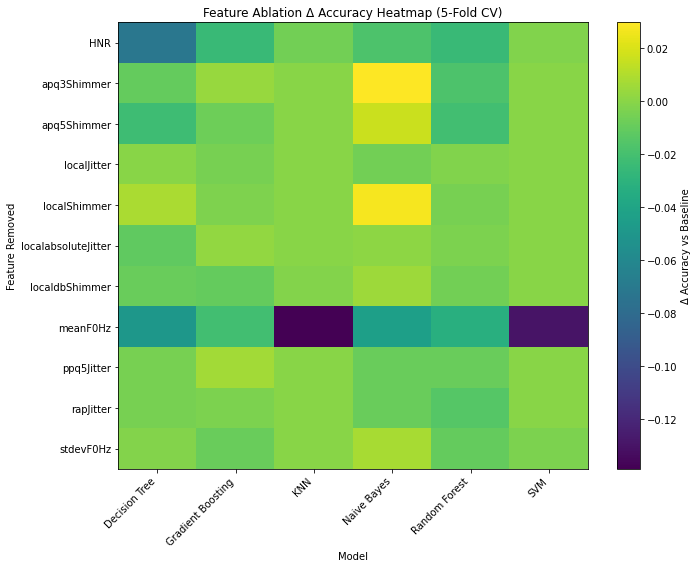

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.base            import clone
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.svm             import SVC
from sklearn.tree            import DecisionTreeClassifier
from sklearn.naive_bayes     import GaussianNB
from sklearn.ensemble        import RandomForestClassifier, GradientBoostingClassifier

# 1) Define your models
models = {
    'KNN':               KNeighborsClassifier(n_neighbors=10),
    'SVM':               SVC(),
    'Decision Tree':     DecisionTreeClassifier(),
    'Naive Bayes':       GaussianNB(),
    'Random Forest':     RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# 2) Pull features & label directly from your DataFrame `df`
X_full = df.iloc[:, :-1]   # all feature columns
y_full = df.iloc[:,  -1]   # the label column

# 3) 5-fold stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# 4) Cross-validated leave-one-feature-out
records = []
for name, model in models.items():
    # baseline avg accuracy with ALL features
    base_acc = cross_val_score(model, X_full, y_full,
                               scoring='accuracy', cv=cv,
                               n_jobs=-1).mean()

    for feat in X_full.columns:
        # drop a single feature
        X_drop = X_full.drop(columns=[feat])
        # avg accuracy without that feature
        acc = cross_val_score(model, X_drop, y_full,
                              scoring='accuracy', cv=cv,
                              n_jobs=-1).mean()

        records.append({
            'model':           name,
            'feature_removed': feat,
            'avg_accuracy':    acc,
            'delta_vs_base':   acc - base_acc
        })

# 5) Build DataFrame and inspect
ablation_all = pd.DataFrame(records)
print("Top 10 worst Δ accuracy drops (model × feature):")
print(ablation_all.sort_values('delta_vs_base').head(10).to_string(index=False))

# 6) Pivot & plot heatmap
wide = ablation_all.pivot(index='feature_removed',
                          columns='model',
                          values='delta_vs_base')

plt.figure(figsize=(10, 8))
plt.imshow(wide.values, aspect='auto', interpolation='nearest')
plt.colorbar(label='Δ Accuracy vs Baseline')
plt.xticks(range(len(wide.columns)), wide.columns, rotation=45, ha='right')
plt.yticks(range(len(wide.index)), wide.index)
plt.xlabel('Model')
plt.ylabel('Feature Removed')
plt.title('Feature Ablation Δ Accuracy Heatmap (5-Fold CV)')
plt.tight_layout()
plt.show()


### 